In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**import data**

In [2]:

df_main = pd.read_csv('df_mainlast.csv')
# df_main

In [3]:
df_option = pd.read_csv('df_option.csv')
# df_option

In [4]:
len(df_option['option'].unique())

100

In [5]:
df_option['option'].unique()

array(['ที่นั่งกลางแจ้ง', 'บริการจัดส่ง', 'สั่งกลับบ้าน',
       'นั่งรับประทานที่ร้าน', 'กาแฟรสชาติเยี่ยม', 'ขนมหวานรสชาติเยี่ยม',
       'ตัวเลือกชารสเลิศ', 'ตัวเลือกเบียร์รสชาติเยี่ยม', 'อาหารค่ำ',
       'รับประทานอาหารคนเดียว', 'เหมาะกับการทำงานด้วยแล็ปท็อป', 'กาแฟ',
       'เบียร์', 'ไวน์', 'อาหารจานเล็ก', 'อาหารมื้อดึก', 'แอลกอฮอล์',
       'อาหารเช้า', 'อาหารมื้อสาย', 'อาหารกลางวัน', 'บริการจัดเลี้ยง',
       'ของหวาน', 'ที่นั่ง', 'ห้องน้ำ', 'ความเป็นกันเอง', 'ทันสมัย',
       'โรแมนติก', 'อบอุ่น', 'ขาจร', 'นักศึกษามหาวิทยาลัย',
       'พื้นที่ที่ยอมรับบุคคลข้ามเพศ', 'มาเป็นกลุ่ม',
       'เหมาะสำหรับครอบครัว', 'เหมาะสำหรับ LGBTQ+', 'รับจอง',
       'บัตรเครดิต', 'บัตรเดบิต', 'เมนูสำหรับเด็ก', 'เหมาะสำหรับเด็ก',
       'มีที่จอดจำนวนมาก', 'ที่จอดรถแบบไม่เสียค่าใช้จ่าย',
       'ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย', 'ที่จอดรถแบบเสียค่าใช้จ่าย',
       'อาหารจานด่วน', 'เงียบ', 'เก้าอี้ทานข้าวสำหรับเด็ก',
       'จัดส่งโดยไม่สัมผัส', 'หาที่จอดค่อนข้างยาก',
       'รับสินค้าโดยไม่ต้

In [6]:
df_review = pd.read_csv('df_review.csv')
# df_review

**Merge**

In [7]:
# 1. Merge df_main กับ df_option เป็น DataFrame พื้นฐาน
merged_df_base = pd.merge(df_main, df_option, on='id_option_main', how='left')

In [8]:

# 2. สร้าง DataFrame ชั่วคราวสำหรับการคำนวณ sentiment counts
# โดยนำ df_review ที่มีคอลัมน์ 'sentiment' มา merge กับ merged_df_base
# เราต้องการ 'id_review_main', 'name', และ 'sentiment' ใน DataFrame นี้
# df_main มี 'id_review_main' และ 'name'
df_for_sentiment_calculation = pd.merge(
    df_main[['id_review_main', 'name']], # เลือกเฉพาะคอลัมน์ที่จำเป็นจาก df_main
    df_review[['id_review_main', 'sentiment']],
    on='id_review_main',
    how='left'
)

In [9]:

# Merge df_main กับ df_option
merged_df = pd.merge(df_main, df_option, on='id_option_main', how='left')

# Merge เอาเฉพาะคอลัมน์ sentiment จาก df_review
merged_df = pd.merge(
    merged_df,
    df_review[['id_review_main', 'sentiment']],  # เอาแค่ 2 คอลัมน์นี้
    on='id_review_main',
    how='left'
)

# merged_df[merged_df['sentiment'] == 'neu']

# สร้างตารางนับ sentiment ต่อร้าน
sentiment_counts = merged_df.groupby('name')['sentiment'].value_counts().unstack(fill_value=0).reset_index()

# รวมกลับเข้า merged_df ด้วย left join
merged_df = pd.merge(merged_df, sentiment_counts, on='name', how='left')

merged_df 

,name,lat,long,url,rating,comment,sal1,sal2,id_open_close_main,id_customer_main,...,distance_bu,distance_tu,distance_rsu,weighted_rating,amazon,option,sentiment,neg,neu,pos
0,Cafe’ Amazon RM2076,13.992462,100.648220,https://www.google.com/maps/place/Cafe%E2%80%9...,4.2,115,฿1-100 ต่อคน,7.0,oc_500,ci_500,...,6.479161,9.992976,7.601018,NaN,1,NaN,NaN,NaN,NaN,NaN
1,ร้านกาแฟ อเมซอน,13.989384,100.634434,https://www.google.com/maps/place/%E0%B8%A3%E0...,4.4,103,฿1-100 ต่อคน,7.0,oc_501,ci_501,...,6.043252,9.726211,6.097600,NaN,1,NaN,NaN,NaN,NaN,NaN
2,Café Amazon สาขา โครงการรังสิตสเตชั่น (สำนักงา...,14.007563,100.614831,https://www.google.com/maps/place/Caf%C3%A9+Am...,3.5,13,฿100-200 ต่อคน,5.0,oc_502,ci_502,...,3.559212,7.263149,5.678762,NaN,1,NaN,NaN,NaN,NaN,NaN
3,CAFÉ AMAZON รังสิต 200 ปี ซอย 4,13.989060,100.606208,https://www.google.com/maps/place/CAF%C3%89+AM...,4.3,12,฿1-100 ต่อคน,5.0,oc_503,ci_503,...,5.654628,9.252708,3.516978,NaN,1,NaN,NaN,NaN,NaN,NaN
4,Café Amazon สาขาม.รังสิต,13.970512,100.630860,https://www.google.com/maps/place/Caf%C3%A9+Am...,3.5,6,NaN,NaN,oc_504,ci_504,...,7.916160,11.637719,5.196244,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88246,Tea & Coffee Home,13.987088,100.613803,https://www.google.com/maps/place/Tea+%26+Coff...,4.7,20,NaN,NaN,oc_261,ci_261,...,5.830216,9.512763,4.018215,4.587529,0,ของหวาน,NaN,NaN,NaN,NaN
88247,Tea & Coffee Home,13.987088,100.613803,https://www.google.com/maps/place/Tea+%26+Coff...,4.7,20,NaN,NaN,oc_261,ci_261,...,5.830216,9.512763,4.018215,4.587529,0,ความเป็นกันเอง,NaN,NaN,NaN,NaN
88248,Tea & Coffee Home,13.987088,100.613803,https://www.google.com/maps/place/Tea+%26+Coff...,4.7,20,NaN,NaN,oc_261,ci_261,...,5.830216,9.512763,4.018215,4.587529,0,ทันสมัย,NaN,NaN,NaN,NaN
88249,Tea & Coffee Home,13.987088,100.613803,https://www.google.com/maps/place/Tea+%26+Coff...,4.7,20,NaN,NaN,oc_261,ci_261,...,5.830216,9.512763,4.018215,4.587529,0,เมนูสำหรับเด็ก,NaN,NaN,NaN,NaN


In [10]:
name_col = 'name' # ชื่อคอลัมน์ที่ใช้ระบุร้านอาหาร

if name_col not in merged_df.columns:
    print(f"ERROR: Column '{name_col}' not found in merged_df!")
    print(f"Available columns are: {merged_df.columns.tolist()}")
else:
    unique_restaurants_before = merged_df[name_col].nunique()
    print(f"\nNumber of unique restaurants based on '{name_col}' before grouping: {unique_restaurants_before}")

    # กำหนดวิธีการ aggregation สำหรับแต่ละคอลัมน์
    aggregation_rules = {}
    for col in merged_df.columns:
        if col == name_col:
            continue # ข้ามคอลัมน์ที่ใช้ group by
        elif col == 'option':
            # สำหรับคอลัมน์ 'option', ให้รวมสตริงของ options ทั้งหมด
            # โดย .dropna() เพื่อลบค่า NaN, .astype(str) เพื่อแปลงเป็นสตริง,
            # และ ' '.join() เพื่อรวมสตริงด้วยช่องว่าง
            aggregation_rules[col] = lambda x: ' '.join(x.dropna().astype(str).unique())
        else:
            # สำหรับคอลัมน์อื่นๆ ให้ใช้ค่าแรกที่พบ (first)
            # เนื่องจากข้อมูล เช่น lat, long, rating, และ sentiment scores (neg, neu, pos)
            # ควรจะเหมือนกันสำหรับทุกแถวของร้านเดียวกันใน merged_df (จากเซลล์ 337)
            aggregation_rules[col] = 'first'

    # ทำการ group by ตามชื่อร้านอาหารและ aggregate ตาม rules ที่กำหนด
    df_ready = merged_df.groupby(name_col, as_index=False).agg(aggregation_rules)
    
    # (Optional) จัดลำดับคอลัมน์ให้เหมือนเดิมหากมีการเปลี่ยนแปลง
    # column_order = [name_col] + [col for col in merged_df.columns if col not in [name_col, 'option']] + ['option']
    # df_ready = df_ready.reindex(columns=column_order)


# df_ready.head()


Number of unique restaurants based on 'name' before grouping: 226


In [11]:
df_ready.columns

Index(['name', 'lat', 'long', 'url', 'rating', 'comment', 'sal1', 'sal2',
       'id_open_close_main', 'id_customer_main', 'id_option_main',
       'id_review_main', 'zone', 'distance_rangsit', 'distance_khlong_rangsit',
       'distance_lak_hok', 'distance_rmutt', 'distance_nbu', 'distance_bu',
       'distance_tu', 'distance_rsu', 'weighted_rating', 'amazon', 'option',
       'sentiment', 'neg', 'neu', 'pos'],
      dtype='object')

**group good comment & rating**

*comment*

In [12]:
# คำนวณค่าสถิติ
comment_mean = df_ready['comment'].mean()
comment_median = df_ready['comment'].median()
comment_min = df_ready['comment'].min()
comment_max = df_ready['comment'].max()

# คำนวณควอร์ไทล์
q1 = df_ready['comment'].quantile(0.25)  # ควอร์ไทล์ที่ 1 (25%)
q3 = df_ready['comment'].quantile(0.75)  # ควอร์ไทล์ที่ 3 (75%)

print(f"ค่าเฉลี่ย (Mean) ของจำนวนคอมเมนต์: {comment_mean:.2f}")
print(f"ค่ามัธยฐาน (Median) ของจำนวนคอมเมนต์: {comment_median}")
print(f"จำนวนคอมเมนต์น้อยที่สุด: {comment_min}")
print(f"จำนวนคอมเมนต์มากที่สุด: {comment_max}")
print(f"ควอร์ไทล์ที่ 1 (Q1 - 25%): {q1}")
print(f"ควอร์ไทล์ที่ 3 (Q3 - 75%): {q3}")

# ลองดูว่าเกณฑ์ 100 ของคุณอยู่ที่เปอร์เซ็นไทล์เท่าใด
from scipy.stats import percentileofscore
percentile_of_100 = percentileofscore(df_ready['comment'], 100)
print(f"เกณฑ์ 100 คอมเมนต์ อยู่ที่ประมาณเปอร์เซ็นไทล์ที่: {percentile_of_100:.2f}")

ค่าเฉลี่ย (Mean) ของจำนวนคอมเมนต์: 89.13
ค่ามัธยฐาน (Median) ของจำนวนคอมเมนต์: 19.0
จำนวนคอมเมนต์น้อยที่สุด: 1
จำนวนคอมเมนต์มากที่สุด: 3448
ควอร์ไทล์ที่ 1 (Q1 - 25%): 6.0
ควอร์ไทล์ที่ 3 (Q3 - 75%): 61.5
เกณฑ์ 100 คอมเมนต์ อยู่ที่ประมาณเปอร์เซ็นไทล์ที่: 81.86


c:\Users\ppich\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ppich\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ppich\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ppich\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ppich\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ppich\an

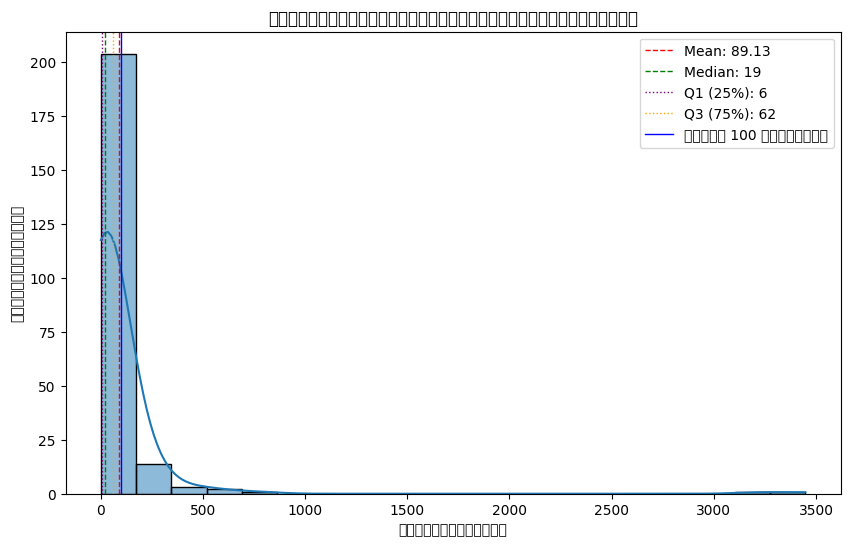

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_ready['comment'], bins=20, kde=True) # bins คือจำนวนแท่ง, kde คือเส้นโค้งความหนาแน่น
plt.title('การกระจายตัวของจำนวนคอมเมนต์ร้านอาหาร')
plt.xlabel('จำนวนคอมเมนต์')
plt.ylabel('จำนวนร้านอาหาร')
plt.axvline(comment_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {comment_mean:.2f}')
plt.axvline(comment_median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {comment_median:.0f}')
plt.axvline(q1, color='purple', linestyle='dotted', linewidth=1, label=f'Q1 (25%): {q1:.0f}')
plt.axvline(q3, color='orange', linestyle='dotted', linewidth=1, label=f'Q3 (75%): {q3:.0f}')
plt.axvline(100, color='blue', linestyle='solid', linewidth=1, label='เกณฑ์ 100 คอมเมนต์') # เพิ่มเส้นเกณฑ์ 100
plt.legend()
plt.show()

จาก Histogram 

* **Mean (ค่าเฉลี่ย): 89.13**
* **Median (ค่ามัธยฐาน): 19**
* **Q1 (25%): 6**
* **Q3 (75%): 62**
* **เกณฑ์ 100 คอมเมนต์ (เส้นสีน้ำเงิน)**

**การวิเคราะห์จากข้อมูลนี้:**

1.  **การกระจายตัวแบบเบ้ขวา (Right-skewed) ชัดเจนมาก:**
    * จะเห็นว่าแท่ง Histogram ส่วนใหญ่กระจุกตัวอยู่ที่ฝั่งซ้าย (จำนวนคอมเมนต์น้อย) และมีหางยาวไปทางขวา (มีร้านจำนวนไม่มากที่มีคอมเมนต์สูงมากๆ)
    * ค่า Mean (89.13) สูงกว่า Median (19) มาก ซึ่งยืนยันลักษณะการเบ้ขวา แสดงว่าค่าเฉลี่ยถูกดึงขึ้นโดยร้านที่มีจำนวนคอมเมนต์สูงมากๆ เพียงไม่กี่ร้าน

2.  **ค่ามัธยฐาน (Median) และควอร์ไทล์ (Quartiles):**
    * **Median = 19**: หมายความว่า 50% ของร้านอาหารทั้งหมด มีจำนวนคอมเมนต์น้อยกว่าหรือเท่ากับ 19 คอมเมนต์
    * **Q1 = 6**: 25% ของร้านอาหารมีคอมเมนต์น้อยกว่าหรือเท่ากับ 6 คอมเมนต์
    * **Q3 = 62**: 75% ของร้านอาหารมีคอมเมนต์น้อยกว่าหรือเท่ากับ 62 คอมเมนต์ หรืออีกนัยหนึ่งคือ **Top 25% ของร้านอาหาร เริ่มต้นที่ประมาณ 62 คอมเมนต์ขึ้นไป**

3.  **การพิจารณาเกณฑ์ 100 คอมเมนต์:**
    * เส้นเกณฑ์ 100 คอมเมนต์ (สีน้ำเงิน) อยู่ค่อนข้างไปทางขวาของ Q3 (62) อย่างชัดเจน
    * ซึ่งหมายความว่าการที่คุณเลือกเกณฑ์ 100 คอมเมนต์นั้น เป็นการเลือกกลุ่มร้านอาหารที่อยู่ใน **กลุ่มบนสุด (Top tier) จริงๆ ในแง่ของจำนวนคอมเมนต์** น่าจะน้อยกว่า Top 25% พอสมควร (จากข้อมูลที่คุณเคยให้ว่าได้ 41 ร้านจาก 226 ร้าน ซึ่งคือประมาณ Top 18%)

**จากข้อมูลนี้ จะกำหนดเกณฑ์เท่าไหร่ดี?**

การเลือกเกณฑ์ขึ้นอยู่กับว่าคุณต้องการ "ความเข้มงวด" ในการคัดเลือกร้านมากน้อยแค่ไหน:

* **ถ้ายังคงใช้เกณฑ์ 100 คอมเมนต์:**
    * **ข้อดี**: คุณจะได้กลุ่มร้านอาหารที่ "โดดเด่น" และมีคนพูดถึงเยอะมากจริงๆ (Top ~18%) ซึ่งถ้าเป้าหมายคือการวิเคราะห์ร้านที่เป็นที่รู้จักอย่างกว้างขวาง เกณฑ์นี้ก็ยังสมเหตุสมผล
    * **ข้อควรระวัง**: คุณอาจจะพลาดร้านดีๆ หลายร้านที่อาจจะมีคอมเมนต์อยู่ในช่วง Q3 (62 คอมเมนต์) ขึ้นไป แต่ยังไม่ถึง 100 ซึ่งก็ยังถือว่ามีคนรีวิวในระดับที่ดี (Top 25%)

* **ถ้าพิจารณาใช้ Q3 (ประมาณ 62 คอมเมนต์) เป็นเกณฑ์:**
    * **ข้อดี**: คุณจะได้กลุ่มร้านอาหารที่กว้างขึ้น คือ Top 25% ของร้านทั้งหมด ซึ่งยังคงเป็นกลุ่มที่มีจำนวนรีวิวค่อนข้างสูงเมื่อเทียบกับร้านส่วนใหญ่ (ที่ Median อยู่แค่ 19) การมีจำนวนร้านมากขึ้น (มากกว่า 41 ร้าน) อาจทำให้เห็น "ลักษณะของร้านที่ดี" ได้หลากหลายขึ้น
    * **จำนวนร้านที่ได้**: ประมาณ 25% ของ 226 ร้าน คือประมาณ 56-57 ร้าน

* **ถ้าพิจารณาค่าระหว่าง Q3 กับ 100:**
    * คุณอาจจะลองเลือกเกณฑ์ที่อยู่ระหว่าง 62 กับ 100 เช่น 75 หรือ 80 คอมเมนต์ เพื่อเป็นจุดกึ่งกลางระหว่างการได้กลุ่มที่โดดเด่นกับการไม่คัดร้านออกมากจนเกินไป

**คำแนะนำ:**

1.  **ลองใช้ Q3 (62 คอมเมนต์) เป็นจุดเริ่มต้นอีกทางเลือกหนึ่ง:** ลองกรองร้านอาหารด้วยเกณฑ์ `comment >= 62` แล้วดูว่าได้จำนวนร้านอาหารกี่ร้าน และร้านเหล่านั้นมีลักษณะโดยรวมเป็นอย่างไรเมื่อเทียบกับกลุ่มที่ได้จากเกณฑ์ 100
2.  **เปรียบเทียบผลลัพธ์**: ลองเปรียบเทียบรายชื่อร้านอาหาร หรือลักษณะโดยรวมของร้านอาหารที่ได้จากทั้งสองเกณฑ์ (เช่น 62 vs 100) ว่ามีความแตกต่างกันมากน้อยเพียงใด และเกณฑ์ไหนที่ให้กลุ่มตัวอย่างที่ "รู้สึกว่าใช่" มากกว่าสำหรับวัตถุประสงค์ของคุณ
3.  **วัตถุประสงค์ยังคงสำคัญที่สุด**:
    * ถ้าคุณต้องการร้านที่ "เด่นชัด" และ "มั่นใจได้ว่ามีคนรีวิวเยอะจริง" เพื่อลดความเสี่ยงจากข้อมูลที่ไม่น่าเชื่อถือ เกณฑ์ 100 ก็ยังใช้ได้
    * ถ้าคุณต้องการ "ขยายขอบเขต" เพื่อให้เห็นภาพรวมของร้านที่ "ค่อนข้างดีและมีคนรีวิวพอสมควร" การลดเกณฑ์ลงมาแถวๆ Q3 (62 คอมเมนต์) หรือสูงกว่าเล็กน้อย อาจจะเหมาะสมกว่า


เลือกที่ Q3 เพราะจะได้โฟกัสแค่ร้านที่ดี

In [14]:
# กรอง DataFrame ให้เหลือเฉพาะแถวที่ค่าในคอลัมน์ 'comment' >= 62
df_filtered_by_comment = df_ready[df_ready['comment'] >= 62]

# แสดงผล DataFrame ที่กรองแล้ว
print(f"จำนวนร้านอาหารทั้งหมด: {len(df_ready)}")
print(f"จำนวนร้านอาหารที่มี comment ตั้งแต่ 62 ขึ้นไป: {len(df_filtered_by_comment)}")
print("\nตัวอย่างร้านอาหารที่มี comment ตั้งแต่ 62 ขึ้นไป:")
print(df_filtered_by_comment[['name', 'comment', 'rating']].head())

# หากต้องการใช้งาน df_filtered_by_comment ต่อไป ก็สามารถทำได้เลย
# หรือถ้าต้องการให้ df_ready อัปเดตเป็นข้อมูลที่กรองแล้ว ก็ใช้
df_ready = df_filtered_by_comment
# df_ready.head()

จำนวนร้านอาหารทั้งหมด: 226
จำนวนร้านอาหารที่มี comment ตั้งแต่ 62 ขึ้นไป: 57

ตัวอย่างร้านอาหารที่มี comment ตั้งแต่ 62 ขึ้นไป:
                        name  comment  rating
10           Aprilhouse café      191     4.5
11       Atcafe RSU เมืองเอก      119     4.4
16                 Bearhouse      639     4.9
24                 CHRA CAFÉ      455     4.6
26  COF ESCAPE (Coffee shop)      166     4.5


In [15]:
df_ready.shape

(57, 28)

*rating*

In [16]:
rating_filter_df = df_ready[df_ready['rating'] >= 4]
rating_filter_df
print(rating_filter_df.shape)

(57, 28)


🔍 ปัญหาคือ:
จากร้านทั้งหมด 226 ร้าน


มีร้านที่ได้คะแนนเฉลี่ย ตั้งแต่ 4 ขึ้นไปคือ ทั้งหมด

 → ทำให้เกณฑ์ "≥ 4" ไม่ได้ช่วยคัดแยกร้านที่ดีได้อย่างชัดเจนอีกต่อไป
 
 → เพราะมันรวม ทุกร้านอยู่ในกลุ่มดีหมด




**เลยจะใช้การแบ่งตามควอไทล์ (Quantile)แทน**


In [17]:

# Calculate the score at the 75th percentile (top 25%)
q75 = df_ready['rating'].quantile(0.75)
print(f"The rating score at the 75th percentile (q75) is: {q75}")

# Filter for restaurants with ratings greater than or equal to this score
df_good = df_ready[df_ready['rating'] >= q75]

# Display the first few rows of the 'df_good' DataFrame
print("\nTop 25% of restaurants (df_good):")
df_good

# You can also check the shape of the new DataFrame
print(f"\nShape of df_good: {df_good.shape}")
print(f"Shape of the original DataFrame: {df_ready.shape}")

The rating score at the 75th percentile (q75) is: 4.7

Top 25% of restaurants (df_good):

Shape of df_good: (15, 28)
Shape of the original DataFrame: (57, 28)


In [19]:

ready_tf_idf = df_ready[df_ready['rating']  >= q75]


print(ready_tf_idf.shape)
ready_tf_idf.head()


(15, 28)


,name,lat,long,url,rating,comment,sal1,sal2,id_open_close_main,id_customer_main,...,distance_bu,distance_tu,distance_rsu,weighted_rating,amazon,option,sentiment,neg,neu,pos
16,Bearhouse,13.988492,100.617651,https://www.google.com/maps/place/Bearhouse/@1...,4.9,639,฿100-200 ต่อคน,177.0,oc_229,ci_229,...,5.697272,9.405528,4.451270,4.882625,0,บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน...,pos,54.0,36.0,630.0
30,CURVE CAF',14.061702,100.608857,https://www.google.com/maps/place/CURVE+CAF'/@...,4.8,88,฿1-100 ต่อคน,46.0,oc_72,ci_72,...,2.503755,1.225521,10.896994,4.726919,0,บริการจัดส่ง การเปิดให้บริการที่หน้าร้าน สั่งก...,pos,0.0,63.0,147.0
80,Horme Cafe หอม คาเฟ่ สาขารังสิต,13.994780,100.618098,https://www.google.com/maps/place/Horme+Cafe+%...,4.7,133,฿100-200 ต่อคน,78.0,oc_114,ci_114,...,5.006667,8.720769,4.899761,4.665500,0,ที่นั่งกลางแจ้ง บริการจัดส่ง ไดรฟ์ทรู สั่งกลับ...,neu,0.0,93.0,217.0
82,Hygge Cafe by StepUp,14.067148,100.604914,https://www.google.com/maps/place/Hygge+Cafe+b...,4.9,190,฿1-100 ต่อคน,79.0,oc_54,ci_54,...,3.188337,0.574771,11.386644,4.847166,0,สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเย...,pos,0.0,19.0,171.0
104,Maidreamin Future Park,13.988628,100.616985,https://www.google.com/maps/place/Maidreamin+F...,5.0,3221,฿100-200 ต่อคน,1.0,oc_233,ci_233,...,5.675994,9.380864,4.399123,4.995502,0,รับสินค้าโดยไม่ต้องลงจากรถ การเปิดให้บริการที่...,pos,0.0,0.0,2626.0


**TF-IDF**

In [20]:
print(ready_tf_idf['option'])

16     บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน...
30     บริการจัดส่ง การเปิดให้บริการที่หน้าร้าน สั่งก...
80     ที่นั่งกลางแจ้ง บริการจัดส่ง ไดรฟ์ทรู สั่งกลับ...
82     สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเย...
104    รับสินค้าโดยไม่ต้องลงจากรถ การเปิดให้บริการที่...
112    รับสินค้าโดยไม่ต้องลงจากรถ บริการจัดส่ง ไดรฟ์ท...
126    รับสินค้าโดยไม่ต้องลงจากรถ จัดส่งโดยไม่สัมผัส ...
132    จัดส่งโดยไม่สัมผัส บริการจัดส่ง สั่งกลับบ้าน น...
145    ที่นั่งกลางแจ้ง บริการจัดส่ง สั่งกลับบ้าน นั่ง...
149    สั่งกลับบ้าน นั่งรับประทานที่ร้าน กาแฟรสชาติเย...
169    จัดส่งโดยไม่สัมผัส บริการจัดส่ง สั่งกลับบ้าน น...
179    ที่จอดรถที่เก้าอี้รถเข็นสามารถใช้ได้ ที่นั่งกล...
190    บริการจัดส่ง สั่งกลับบ้าน นั่งรับประทานที่ร้าน...
194                                                     
200    ที่นั่งกลางแจ้ง สั่งกลับบ้าน นั่งรับประทานที่ร...
Name: option, dtype: object


In [21]:
# ทำ TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# ✅ กลุ่มคำทั้งหมดที่คุณให้มา (cleaned เป็น list)
custom_phrases = [
    'ที่นั่งกลางแจ้ง', 'บริการจัดส่ง', 'สั่งกลับบ้าน',
       'นั่งรับประทานที่ร้าน', 'กาแฟรสชาติเยี่ยม', 'ขนมหวานรสชาติเยี่ยม',
       'ตัวเลือกชารสเลิศ', 'ตัวเลือกเบียร์รสชาติเยี่ยม', 'อาหารค่ำ',
       'รับประทานอาหารคนเดียว', 'เหมาะกับการทำงานด้วยแล็ปท็อป', 'กาแฟ',
       'เบียร์', 'ไวน์', 'อาหารจานเล็ก', 'อาหารมื้อดึก', 'แอลกอฮอล์',
       'อาหารเช้า', 'อาหารมื้อสาย', 'อาหารกลางวัน', 'บริการจัดเลี้ยง',
       'ของหวาน', 'ที่นั่ง', 'ห้องน้ำ', 'ความเป็นกันเอง', 'ทันสมัย',
       'โรแมนติก', 'อบอุ่น', 'ขาจร', 'นักศึกษามหาวิทยาลัย',
       'พื้นที่ที่ยอมรับบุคคลข้ามเพศ', 'มาเป็นกลุ่ม',
       'เหมาะสำหรับครอบครัว', 'เหมาะสำหรับ LGBTQ+', 'รับจอง',
       'บัตรเครดิต', 'บัตรเดบิต', 'เมนูสำหรับเด็ก', 'เหมาะสำหรับเด็ก',
       'มีที่จอดจำนวนมาก', 'ที่จอดรถแบบไม่เสียค่าใช้จ่าย',
       'ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย', 'ที่จอดรถแบบเสียค่าใช้จ่าย',
       'อาหารจานด่วน', 'เงียบ', 'เก้าอี้ทานข้าวสำหรับเด็ก',
       'จัดส่งโดยไม่สัมผัส', 'หาที่จอดค่อนข้างยาก',
       'รับสินค้าโดยไม่ต้องลงจากรถ', 'ไดรฟ์ทรู', 'ค็อกเทล',
       'ช่วงลดราคาเครื่องดื่ม', 'ช่วงลดราคาอาหาร', 'ต้อนรับสุนัข',
       'อนุญาตให้นําสุนัขเข้าไปด้านใน', 'อนุญาตให้สุนัขอยู่ด้านนอก',
       'Wi-Fi', 'รับเฉพาะเงินสด', 'ระบุว่ามีเจ้าของเป็นผู้หญิง',
       'ทางเข้าสำหรับเก้าอี้รถเข็น',
       'ที่จอดรถที่เก้าอี้รถเข็นสามารถใช้ได้',
       'ที่นั่งสำหรับเก้าอี้รถเข็น', 'ค็อกเทลรสชาติเยี่ยม',
       'เหล้าดีกรีสูง', 'มีบาร์', 'หรูหรา', 'เหมาะกับกิจกรรมวันเกิดเด็ก',
       'ตัวเลือกสำหรับมังสวิรัติ', 'อาหารออร์แกนิก',
       'การชำระเงินผ่าน NFC บนอุปกรณ์เคลื่อนที่', 'ที่จอดรถในพื้นที่',
       'การเปิดให้บริการที่หน้าร้าน', 'ให้บริการอาหารวีแกน',
       'ห้องน้ำรองรับเก้าอี้รถเข็น', 'ดนตรีสด',
       'ระบบอำนวยความสะดวกช่วยเพิ่มการได้ยิน', 'การแสดงสด',
       'ห้องน้ำไม่แบ่งเพศ', 'รายการไวน์ชั้นดี', 'มารับของที่ร้าน',
       'การจัดส่งวันเดียวกัน', 'แวะในช่วงเวลาสั้นๆ', 'โดยปกติต้องรอ',
       'ต้องจอง', 'โรงจอดรถแบบไม่เสียค่าใช้จ่าย', 'การเลือกซื้อในร้านค้า',
       '\ue033', 'อาหารสำเร็จ', 'ต้องนัดหมายล่วงหน้า',
       'ส่วนลดสำหรับครอบครัว', 'ส่วนลดสําหรับเด็ก',
       'แนะนำให้จองอาหารมื้อสาย', 'แนะนำให้จองอาหารกลางวัน',
       'แนะนำให้จองอาหารค่ำ', 'อาหาร', 'หาที่จอดยาก', 'อาหารฮาลาล',
       'กีฬา', 'อุปกรณ์อิเล็กทรอนิกส์', 'บุฟเฟ่ต์'
]

# ✅ เตรียมข้อมูล (เช่นจาก final_df_for_tfidf['all_options'])
corpus = ready_tf_idf['option'].fillna('')

# ✅ ใช้ TF-IDF โดยใส่ vocabulary เอง
vectorizer = TfidfVectorizer(vocabulary=custom_phrases, token_pattern=r"[^ ]+")
tfidf_matrix = vectorizer.fit_transform(corpus)

# ✅ แปลงเป็น DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())




c:\Users\ppich\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [22]:
tfidf_df

,ที่นั่งกลางแจ้ง,บริการจัดส่ง,สั่งกลับบ้าน,นั่งรับประทานที่ร้าน,กาแฟรสชาติเยี่ยม,ขนมหวานรสชาติเยี่ยม,ตัวเลือกชารสเลิศ,ตัวเลือกเบียร์รสชาติเยี่ยม,อาหารค่ำ,รับประทานอาหารคนเดียว,...,ส่วนลดสําหรับเด็ก,แนะนำให้จองอาหารมื้อสาย,แนะนำให้จองอาหารกลางวัน,แนะนำให้จองอาหารค่ำ,อาหาร,หาที่จอดยาก,อาหารฮาลาล,กีฬา,อุปกรณ์อิเล็กทรอนิกส์,บุฟเฟ่ต์
0,0.000000,0.266760,0.206574,0.206574,0.206574,0.219962,0.206574,0.000000,0.000000,0.249875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.210031,0.162644,0.162644,0.162644,0.173185,0.162644,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.242809,0.154306,0.119492,0.119492,0.119492,0.127236,0.119492,0.000000,0.000000,0.144539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.213313,0.213313,0.213313,0.227138,0.213313,0.000000,0.000000,0.258027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.119011,0.119011,0.119011,0.126724,0.119011,0.000000,0.000000,0.143958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.174338,0.135004,0.135004,0.135004,0.143754,0.135004,0.000000,0.000000,0.163303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.224977,0.174218,0.174218,0.174218,0.000000,0.174218,0.000000,0.000000,0.210737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.239332,0.185335,0.185335,0.185335,0.197346,0.185335,0.000000,0.000000,0.224184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.316671,0.201246,0.155842,0.155842,0.155842,0.165942,0.155842,0.000000,0.000000,0.188508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.170943,0.170943,0.170943,0.182022,0.170943,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# 1. รวมค่า TF-IDF ของทุกคำ
all_terms_sum = tfidf_df.sum()

# 2. กรองเอาเฉพาะคำที่มีผลรวมมากกว่า 0
positive_sum_terms = all_terms_sum[all_terms_sum > 0]

# 3. เรียงลำดับคำที่กรองแล้วจากมากไปน้อย
sorted_positive_terms = positive_sum_terms.sort_values(ascending=False)

print("ทุกคำที่มีผลรวม TF-IDF มากกว่า 0 (เรียงจากมากไปน้อย):")
print(sorted_positive_terms)
print(f"\nจำนวนคำทั้งหมดที่มีผลรวม TF-IDF มากกว่า 0: {len(sorted_positive_terms)}")
print(f"จากจำนวนคำเริ่มต้นทั้งหมด: {len(all_terms_sum)}")

ทุกคำที่มีผลรวม TF-IDF มากกว่า 0 (เรียงจากมากไปน้อย):
สั่งกลับบ้าน                            2.134483
นั่งรับประทานที่ร้าน                    2.134483
กาแฟรสชาติเยี่ยม                        2.134483
ตัวเลือกชารสเลิศ                        2.134483
ทันสมัย                                 2.134483
กาแฟ                                    2.134483
ความเป็นกันเอง                          2.134483
ที่จอดรถแบบไม่เสียค่าใช้จ่าย            2.106877
มีที่จอดจำนวนมาก                        2.097554
ของหวาน                                 2.087310
ขนมหวานรสชาติเยี่ยม                     2.087310
รับประทานอาหารคนเดียว                   2.075460
อบอุ่น                                  2.012183
ที่จอดรถริมถนนแบบไม่เสียค่าใช้จ่าย      1.991333
มาเป็นกลุ่ม                             1.983679
บริการจัดส่ง                            1.958564
นักศึกษามหาวิทยาลัย                     1.907689
เหมาะสำหรับเด็ก                         1.848880
ห้องน้ำ                                 1.705182
ขาจร           


### 🔍 หลักการของ TF-IDF คือ:

> **วัด "ความสำคัญ" ของคำแต่ละคำในแต่ละแถว (document) เทียบกับทุกแถวในตาราง (corpus)**

---

### 🧠 สรุปแบบง่ายๆ:

#### 1. **TF (Term Frequency)**:

คือความถี่ของคำ *ในแถวนั้น*
เช่น `"กาแฟ"` ปรากฏในแถวที่ 3 = 1 ครั้ง

#### 2. **IDF (Inverse Document Frequency)**:

คือความ "เฉพาะตัว" ของคำใน corpus


ถ้า `"กาแฟ"` ปรากฏใน **ทุกแถว** → จะมี IDF ต่ำ (ไม่สำคัญเพราะทุกคนมี)


แต่ถ้า `"ขนมหวานรสชาติเยี่ยม"` ปรากฏแค่บางร้าน → IDF จะสูง (คำนี้ช่วยแยกร้านได้ดี)

---

### 🎯 ดังนั้น:

TF-IDF จะให้ค่าที่สูงเมื่อ:

* คำปรากฏบ่อยในเอกสารนั้น (TF สูง)
* แต่ปรากฏน้อยในเอกสารอื่น (IDF สูง)

เช่น ถ้าคำ `"ทันสมัย"` ปรากฏเฉพาะบางร้าน → TF-IDF ของคำนี้จะสูงในร้านเหล่านั้น

---

### ✅ ตัวอย่าง:

| ร้าน | option                    | TF-IDF: "กาแฟ" |
| ---- | ------------------------- | -------------- |
| A    | กาแฟ ขนมหวาน              | สูง            |
| B    | ขนมหวาน อาหาร             | 0              |
| C    | กาแฟ ทันสมัย บริการจัดส่ง | กลาง           |

→ `"กาแฟ"` จะมี TF-IDF สูงในร้าน A และ C แต่ถ้า `"กาแฟ"` มีในทุกร้าน ค่า TF-IDF จะลดลงเพราะ IDF ต่ำลง

---




**COrr ระหว่างratingกับค่าอืนๆในตาราง merged_df**

In [24]:

correlation_with_rating = merged_df.corr(numeric_only=True)['rating']


# If you want to sort the correlations to see the strongest ones (positive or negative)
print("\nSorted correlations with 'rating':")
print(correlation_with_rating.abs().sort_values(ascending=False))


Sorted correlations with 'rating':
rating                     1.000000
weighted_rating            0.867188
neg                        0.362051
neu                        0.310238
sal2                       0.245148
comment                    0.241400
amazon                     0.232418
distance_bu                0.134257
distance_lak_hok           0.123045
distance_tu                0.121279
distance_rsu               0.118077
distance_khlong_rangsit    0.117959
distance_rangsit           0.116420
lat                        0.106262
distance_rmutt             0.106159
pos                        0.058098
distance_nbu               0.056476
long                       0.023507
Name: rating, dtype: float64


**TOP 5**

In [25]:
top_rated_df = ready_tf_idf.sort_values(by='rating', ascending=False)
top_5_df = top_rated_df.head(5)
# top_5_df


**load file**

In [26]:
#load file
tfidf_df.to_csv('tfidf_df.csv', index=False)

ready_tf_idf.to_csv('ready_tf_idf.csv', index=False)